# Monte Carlo Simulation

**1. Simulering av pasientstrøm og belegg (Monte Carlo simulering)**<br>
<br>
**Formål**: Simulere variasjonen i antall pasienter og belegg på avdelingen.<br>
**Hvordan**: Du kan bruke Monte Carlo-simulering for å modellere usikkerhet i pasientankomster og oppholdstid. Dette innebærer å generere et stort antall scenarier basert på historisk data, og beregne sannsynligheten for at avdelingen blir full eller overfylt.<br>
**Resultat**: Estimere risikoen for overbelastning og evaluere hvor ofte det kan oppstå situasjoner med kapasitetsmangel.<br>

## Import necessary libraries

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Input data

In [30]:
avg_daily_admissions = 2  # Gjennomsnittlig daglige ankomster
avg_length_of_stay = 3  # Gjennomsnittlig liggetid (dager)
total_beds = 26  # Totalt antall senger på avdelingen
iterations = 1000  # Antall simuleringer

## Monte Carlo 

**Formål**: Simulere hvordan variasjon i antall pasientankomster og gjennomsnittlig liggetid påvirker sannsynligheten for overbelastning.<br>
<br>
**Nødvendig data**:<br>
<br>
1. Antall pasientankomster per dag (gjennomsnittlig eller historisk fordeling).<br>
2. Gjennomsnittlig liggetid per pasient.<br>
3. Totalt antall senger på avdelingen.<br>

In [31]:
overload_days = 0  # Dager med overbelastning
daily_beds_occupied = []

for _ in range(iterations):
    try:
        new_admissions = np.random.poisson(avg_daily_admissions) # daglige nyankomster
        lengths_of_stay = np.random.exponential(avg_length_of_stay, new_admissions) # liggetid pr nye pasient
        occupied_beds = sum([min(len(lengths_of_stay[lengths_of_stay > day]), total_beds) for day in range(int(max(lengths_of_stay)))]) # daglig antall pasienter på avdelingen
    except:
        occupied_beds = 0
    daily_beds_occupied.append(occupied_beds)
    if occupied_beds > total_beds: # overbelastet?
        overload_days += 1

## Resultat

Sannsynlighet for overbelastning: 1.00%


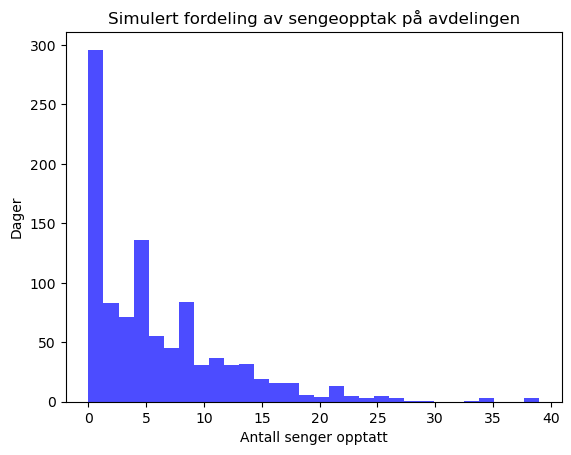

In [33]:
print(f"Sannsynlighet for overbelastning: {overload_days / iterations * 100:.2f}%")
plt.hist(daily_beds_occupied, bins=30, alpha=0.7, color='blue')
plt.xlabel('Antall senger opptatt')
plt.ylabel('Dager')
plt.title('Simulert fordeling av sengeopptak på avdelingen')
plt.show()

**Verdi for sykehuset**:<br>
<br>
1. Identifisere risiko for overbelastning.<br>
2. Finne sannsynligheten for at kapasiteten blir overskredet, slik at bemanningsplaner eller kapasiteten kan justeres.<br>